## Task 1: Data Loading & Exploration

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

# Load Dataset
df = pd.read_csv("IRIS.csv")

# Quick Look
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Task 2: Data Understanding

In [2]:
# Shape of dataset
print("Dataset Shape:", df.shape)

# Check data types and non-null counts
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Class distribution
print("\nClass Distribution:\n", df['species'].value_counts())

# Basic statistics
print("\nSummary Statistics:\n", df.describe())


Dataset Shape: (150, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Class Distribution:
 species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Summary Statistics:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.7

#### Note: 
##### 1.Data Quality
- There are no missing values, so we don't need to perform any data cleaning or imputation.
- **Correct Data Types:** The four measurement columns are correctly identified as numbers `(float64)`, and the `species` column is text `(object)`, which is exactly what we'd expect.
##### 2.Target Variable `(species)`
- **Perfectly Balanced:** We have exactly **50 samples for each of the three species**. This means our machine learning model will have an equal amount of data to learn from for each class, preventing any bias.
##### 3.Feature Insights
- **Petals are Key:** The `petal_length` and `petal_width` have a much larger standard deviation (spread) than the sepal measurements. This is a strong hint that the **petal dimensions are the most powerful predictors** for identifying the flower's species.
- **Sepals are Less Distinct:** Conversely, `sepal_width` has the smallest standard deviation, meaning its size is quite consistent across all three species, making it a less decisive feature on its own.



## Task 3: Data Visualization
 - ### Subtask 3.1: Exploring Iris Flower Features by Species

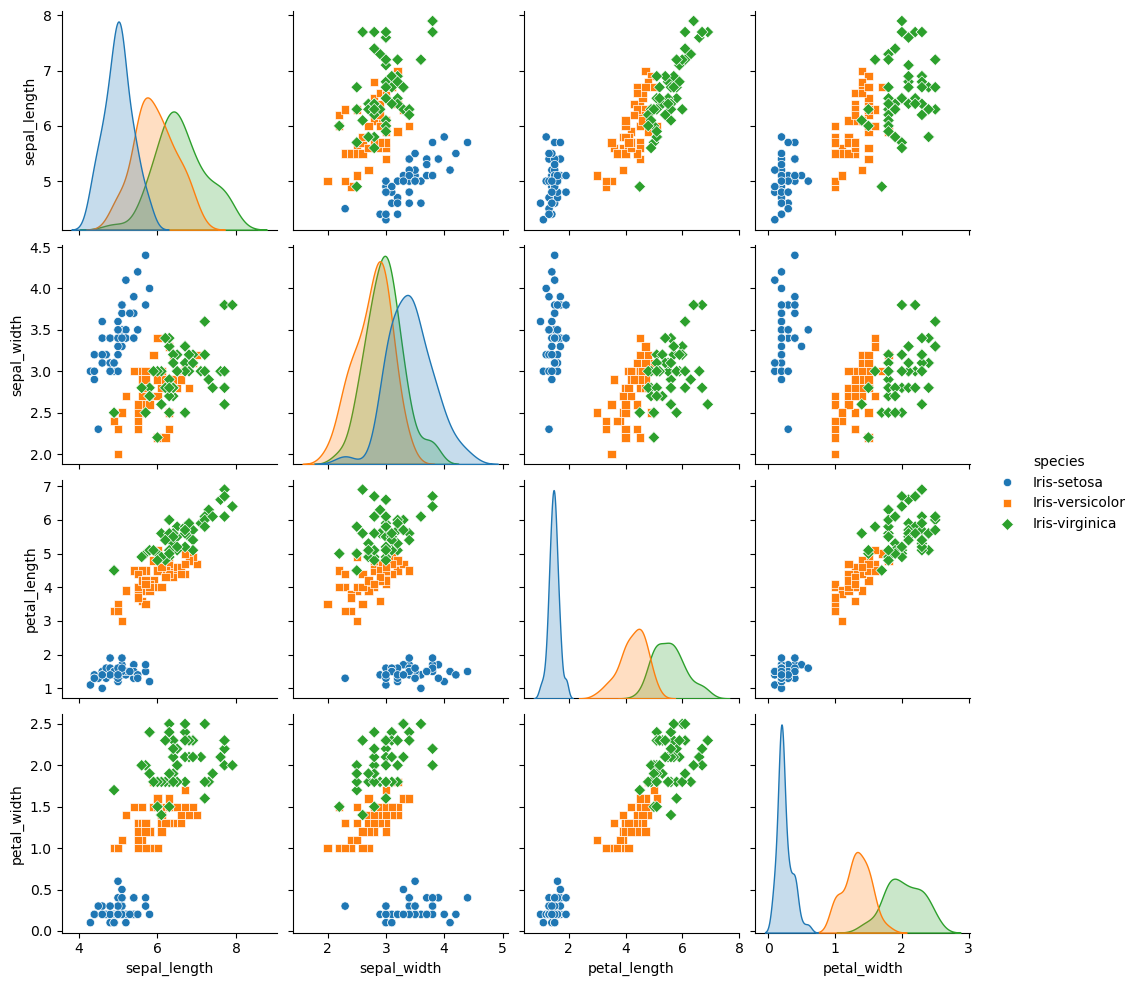

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot to visualize relationships
# hue='species' colors the data points by the flower species
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

### Note:
#### 1. For the Pair Plot
- Notice how the `Iris-setosa` (the blue dots) forms a completely separate cluster in the plots that involve **petal length** and **petal width**. This is a strong visual confirmation that the petal measurements are the best features for identifying `Iris-setosa`.

### Subtask 3.2: Comparing Petal Length Across Species

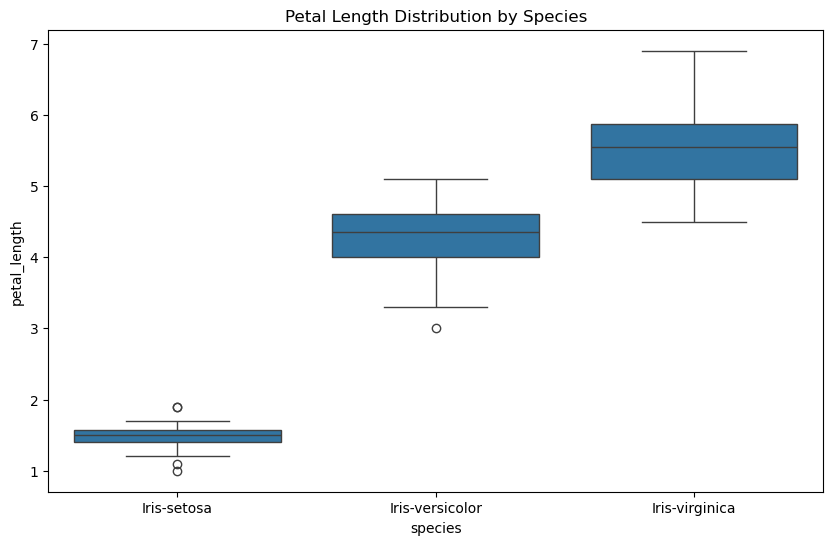

In [4]:
# Box plots to see the distribution of a single feature
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_length', data=df)
plt.title('Petal Length Distribution by Species')
plt.show()

### Note:
#### 2. For the Box Plot
  - There is **no overlap** at all between the petal lengths of `Iris-setosa` and the other two species. `Iris-setosa` always has short petals. While there's a small overlap between `versicolor` and `virginica`, `virginica` clearly has the longest petals on average. This proves again that petal length is a fantastic feature for classifying these flowers.

### Subtask 3.3: Correlation Heatmap

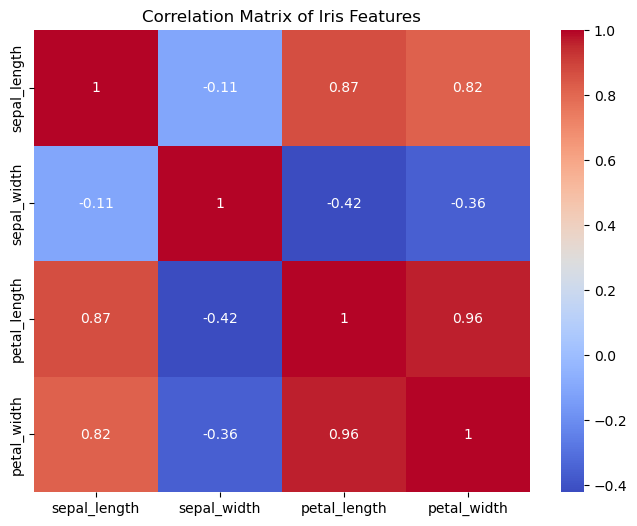

In [5]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Iris Features')
plt.show()

### Note:
- **Petal Length & Petal Width are Best Friends:** The block where `petal_length` and `petal_width` meet is the brightest. This means if a flower has long petals, it almost always has wide petals too. They are very strongly connected.
  
- **Sepal Length is Related to Petals:** `sepal_length` also has a fairly strong positive relationship with both `petal_length` and `petal_width`. In simple terms, flowers with longer sepals tend to have longer and wider petals.

  
- **Sepal Width is the Odd One Out:** Notice that `sepal_width` has very weak (close to zero) or slightly negative correlations with the other features. This means the width of the sepal doesn't really tell you much about the other measurements of the flower.

## Task 4: Prepare the Data

In [6]:
from sklearn.preprocessing import LabelEncoder

# Define X and y
X = df.drop(columns=['species'])
y = df['species']

# Encodes the species names into numbers
le = LabelEncoder()
y = le.fit_transform(y)

print("X and y have been created successfully!")

X and y have been created successfully!


## Task 5: Splitting the Data for Training and Testing

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (105, 4)
Testing set shape: (45, 4)


## Task 6: Model Training and Prediction

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN model
model = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the unseen test data
y_pred = model.predict(X_test)

# First 5 predictions to see the output
print("Predictions for the first 5 test samples:", y_pred[:5])

Predictions for the first 5 test samples: [1 0 2 1 1]


### Subtask 6.1: Decode The Mapping

In [9]:
# This will show the mapping, e.g., ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# This means 0=setosa, 1=versicolor, 2=virginica
print(le.classes_)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Subtask 6.2: Compare Predictions To Actual Answers

In [10]:
# Print the actual answers for the first 5 test samples
print("Actual answers:", y_test[:5])

Actual answers: [1 0 2 1 1]


### Note:
*This Shows the Accuracy of our Model, as our **Predictions for the first 5 test samples: [1 0 2 1 1]** and **Actual answers: [1 0 2 1 1]** are same.*

## Task 7: Model Evaluation

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Final Model Evaluation:")
print("=======================")

# Compare all the predictions (y_pred) with all the actual answers (y_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

print("\nDetailed Classification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Final Model Evaluation:
Overall Accuracy: 100.00%

Detailed Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### Subtask 7.1: Visualizing the Confusion Matrix

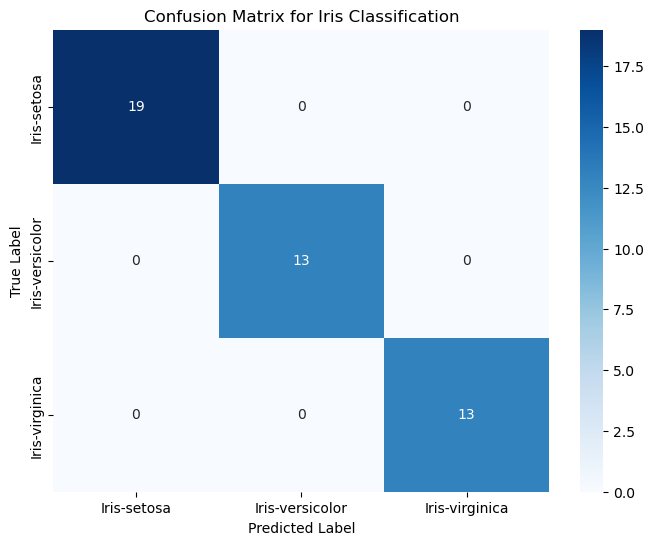

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix again
cm = confusion_matrix(y_test, y_pred)

# Get the class names from the label encoder
class_names = le.classes_

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Iris Classification')
plt.show()

### Note:
*The bright, strong diagonal shows that the vast majority of flowers were classified correctly, while the dark, off-diagonal cells show that the model made very few, if any, mistakes in telling the different species apart.*